# Exercise - DTs for regression

1. Use the `./data/HousingData.csv` data (remember to split your data into a train and test data). Using your training and validation data, optimize the parameters of your DT. How well does your optimized model perform on the test data?
1. (Optional/bonus): Try to perform standardization to your data. Does it improve your model? Further, try to select only the 5 most important features. Does it improve the performance of your model?

**Note:** The HousingData.csv is from [here](https://www.kaggle.com/datasets/altavish/boston-housing-dataset) and the documentation is [here](https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html#:~:text=Variables%20There%20are%2014attributes%20in%20each%20case%20of,variable%20%281%20if%20tract%20bounds%20river%3B%200%20otherwise%29)

**See slides for more details!**

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import tree
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

data = './data/HousingData.csv'
raw_df = pd.read_csv(data).dropna()

print(raw_df.head())

# Create a copy of the DataFrame with column names
df_copy = raw_df.copy()

# Separate the target variable (y) and features (X)
y = df_copy['MEDV']  # Replace 'TargetColumn' with your actual target column name
X = df_copy.drop(columns=['MEDV'])  # Remove the target column

# Use `train_test_split` to split your data into a train and a test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Use `train_test_split` to split your train data into a train and a validation  set.
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

print("The shape of train, validation and test sets are:")
print(X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape)

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222     18.7   
5  0.02985   0.0   2.18   0.0  0.458  6.430  58.7  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
5  394.12   5.21  28.7  
The shape of train, validation and test sets are:
(252, 13) (63, 13) (79, 13) (252,) (63,) (79,)


# Exercise 1

Use the `./data/HousingData.csv` data (remember to split your data into a train and test data). Using your training and validation data, optimize the parameters of your DT. How well does your optimized model perform on the test data? Is it better than your optimized SVM for the same data (the third exercise from last week)?

In [15]:
min_samples_split_list = [6,12] # input values seperated by ",".
min_samples_leaf_list = [5,10,15] # input values seperated by ",".
max_features_list = [2,5,10] # input values seperated by ",".

results = []

for min_samples_split in min_samples_split_list:
    for min_samples_leaf in min_samples_leaf_list:
        for max_features in max_features_list:
            dt_current = tree.DecisionTreeRegressor(min_samples_split=min_samples_split,
                                                    min_samples_leaf=min_samples_leaf,
                                                    max_features=max_features)
                                                    
            dt_current.fit(X_train, y_train)
            y_val_hat = dt_current.predict(X_val)
            mse = mean_squared_error(y_val, y_val_hat)
            results.append([mse, min_samples_split, min_samples_leaf, max_features])

results = pd.DataFrame(results)
results.columns = ['MSE', 'min_samples_split', 'min_samples_leaf', 'max_features']
print(results)

          MSE  min_samples_split  min_samples_leaf  max_features
0   31.945779                  6                 5             2
1   26.120182                  6                 5             5
2   12.867250                  6                 5            10
3   30.131388                  6                10             2
4   18.263444                  6                10             5
5   21.121650                  6                10            10
6   32.969243                  6                15             2
7   15.024120                  6                15             5
8   20.528130                  6                15            10
9   28.307654                 12                 5             2
10  16.697119                 12                 5             5
11  21.927162                 12                 5            10
12  31.661307                 12                10             2
13  23.094618                 12                10             5
14  21.877447            

In [16]:
# Extract best parameters.
print(results[results['MSE'] == results['MSE'].min()])
max_features_optimal = results.loc[results['MSE'].idxmin()]['max_features'].astype(int)
min_samples_split_optimal = results.loc[results['MSE'].idxmin()]['min_samples_split'].astype(int)
min_samples_leaf_optimal = results.loc[results['MSE'].idxmin()]['min_samples_leaf'].astype(int)

        MSE  min_samples_split  min_samples_leaf  max_features
2  12.86725                  6                 5            10


In [17]:
# Initialize your final model
dt_optimized = tree.DecisionTreeRegressor(
                max_features=max_features_optimal,
                min_samples_split=min_samples_split_optimal,
                min_samples_leaf=min_samples_leaf_optimal,
                )   
# Use both training and validation data to fit it (np.concatenate "stacks" the array like rbind in R)
dt_optimized.fit(np.concatenate([X_train, X_val]), np.concatenate([y_train, y_val]))

# Predict on test data
y_test_hat_optimized = dt_optimized.predict(X_test)

# Obtain and check mse on test data
mse_optimized = mean_squared_error(y_test, y_test_hat_optimized)
print(f'Optimized DT achieved MSE = {round(mse_optimized, 2)}.')

Optimized DT achieved MSE = 40.91.


c:\ProgramData\anaconda3\envs\amlfall23\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


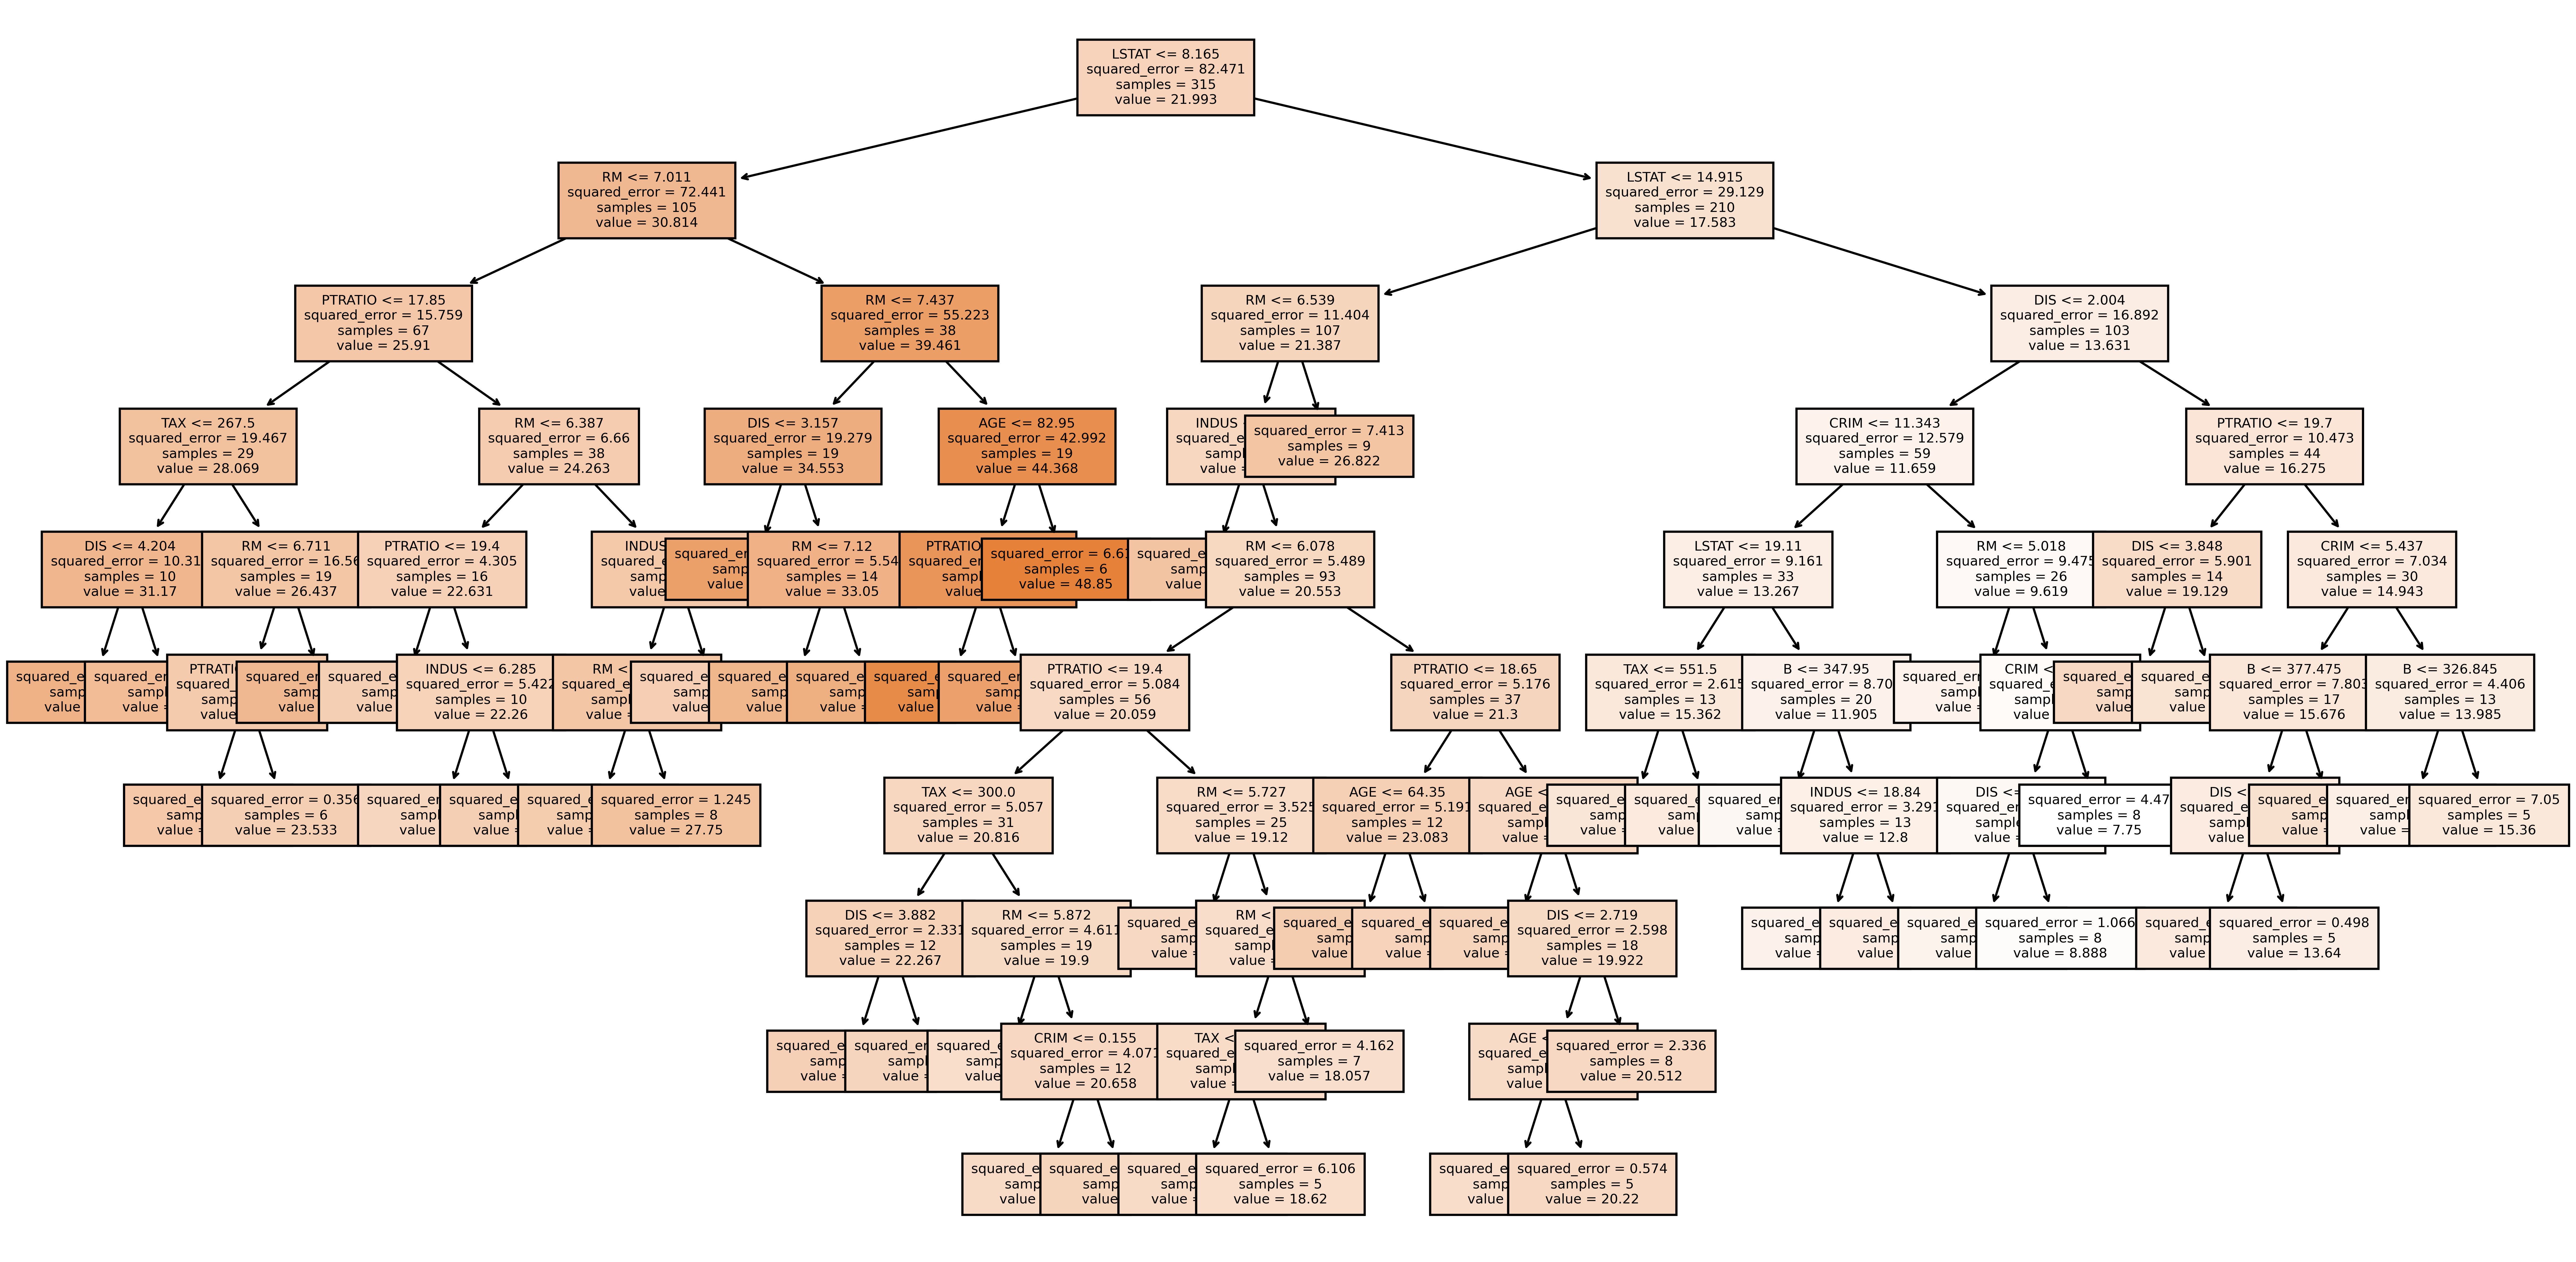

In [5]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1, 1, 1)
tree.plot_tree(dt_optimized, filled=True, feature_names=list(X.columns), ax=ax, fontsize=6 )

dpi = 600  # Adjust the DPI (dots per inch) for higher resolution

# Set the DPI for the current figure
fig.set_dpi(dpi)

plt.show()

# Exercise 2

(Optional/bonus): Try to perform standardization to your data. Does it improve your model? Further, try to select only the 5 most important features. Does it improve the performance of your model?

In [6]:
from sklearn.preprocessing import StandardScaler

# Initialize a StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform the training data. 
# This calculates the mean and standard deviation of each feature in the training set and scales the features accordingly.
X_train_scaled = scaler.fit_transform(X_train)

# Transform the validation and test data using the same scaler
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

print(X_train_scaled.shape, X_val_scaled.shape, X_test_scaled.shape, y_train.shape, y_val.shape, y_test.shape)

(252, 13) (63, 13) (79, 13) (252,) (63,) (79,)


In [7]:
results_scaled = []
for min_samples_split in min_samples_split_list:
    for min_samples_leaf in min_samples_leaf_list:
        for max_features in max_features_list:
            dt_current = tree.DecisionTreeRegressor(min_samples_split=min_samples_split,
                                                    min_samples_leaf=min_samples_leaf,
                                                    max_features=max_features)
                                                    
            dt_current.fit(X_train_scaled, y_train)
            y_val_hat = dt_current.predict(X_val_scaled)
            mse = mean_squared_error(y_val, y_val_hat)
            results_scaled.append([mse, min_samples_split, min_samples_leaf, max_features])

results_scaled = pd.DataFrame(results_scaled)
results_scaled.columns = ['MSE', 'min_samples_split', 'min_samples_leaf', 'max_features']
print(results_scaled)

          MSE  min_samples_split  min_samples_leaf  max_features
0   36.311681                  2                 5             2
1   16.384177                  2                 5             5
2   12.528212                  2                 5            10
3   28.306845                  2                10             2
4   25.646842                  2                10             5
5   19.972882                  2                10            10
6   27.754006                  2                15             2
7   19.478236                  2                15             5
8   39.814273                  2                15            10
9   32.386718                  4                 5             2
10  29.718075                  4                 5             5
11  22.062136                  4                 5            10
12  47.614239                  4                10             2
13  24.820902                  4                10             5
14  20.498429            

In [8]:
# Extract best parameters.
print(results_scaled[results_scaled['MSE'] == results_scaled['MSE'].min()])
max_features_optimal = results_scaled.loc[results_scaled['MSE'].idxmin()]['max_features'].astype(int)
min_samples_split_optimal = results_scaled.loc[results_scaled['MSE'].idxmin()]['min_samples_split'].astype(int)
min_samples_leaf_optimal = results_scaled.loc[results_scaled['MSE'].idxmin()]['min_samples_leaf'].astype(int)

         MSE  min_samples_split  min_samples_leaf  max_features
29  9.542708                 12                 5            10


In [9]:
# Initialize your final model
dt_optimized = tree.DecisionTreeRegressor(
                max_features=max_features_optimal,
                min_samples_split=min_samples_split_optimal,
                min_samples_leaf=min_samples_leaf_optimal,
                )   
# Use both training and validation data to fit it (np.concatenate "stacks" the array like rbind in R)
dt_optimized.fit(np.concatenate([X_train_scaled, X_val_scaled]), np.concatenate([y_train, y_val]))

# Predict on test data
y_test_hat_optimized = dt_optimized.predict(X_test_scaled)

# Obtain and check mse on test data
mse_optimized = mean_squared_error(y_test, y_test_hat_optimized)
print(f'Optimized DT achieved MSE = {round(mse_optimized, 2)}.')

Optimized DT achieved MSE = 40.42.


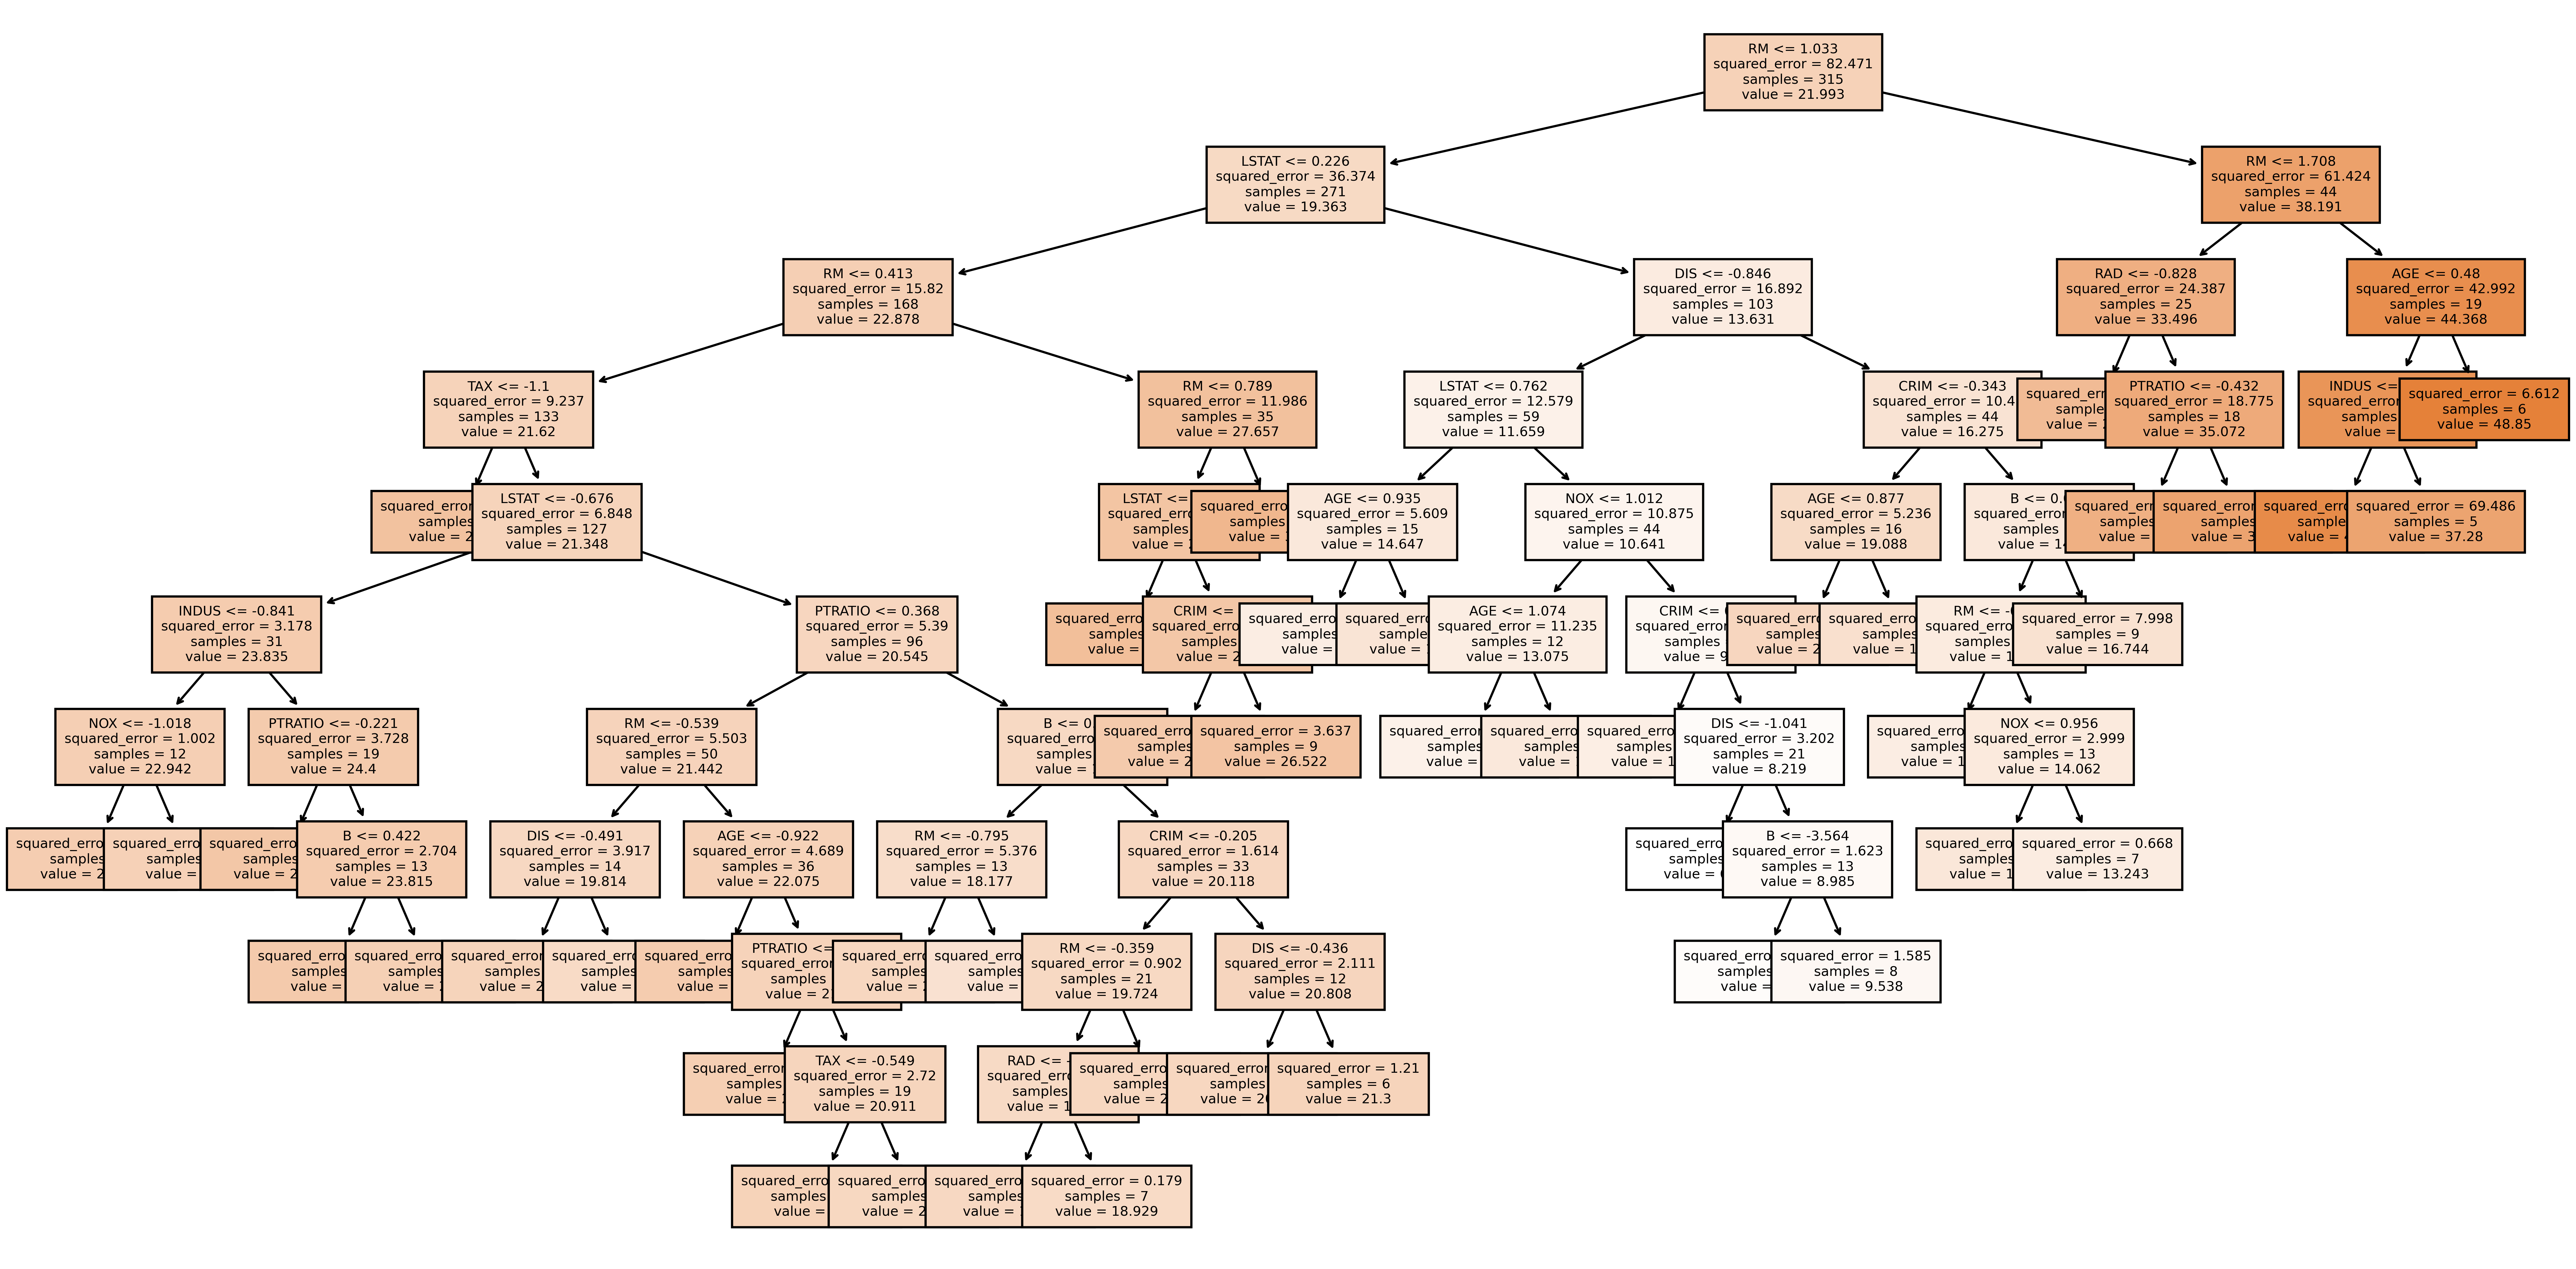

In [10]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1, 1, 1)
tree.plot_tree(dt_optimized, filled=True, feature_names=list(X.columns), ax=ax, fontsize=6 )

dpi = 600  # Adjust the DPI (dots per inch) for higher resolution

# Set the DPI for the current figure
fig.set_dpi(dpi)

plt.show()